# Exercise 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import matplotlib.image as mpimg
import numpy as np
path = '/content/drive/MyDrive/2n UNI/3r Trimestre/Processament Imatges/Labs/Lab2/'

from scipy.fft import fft2, ifft2, fft, ifft

In [ ]:
def show_image(img, title):
  imgplot = plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.show()

def normalize(X):
  return (X - X.min()) / (X.max() - X.min())

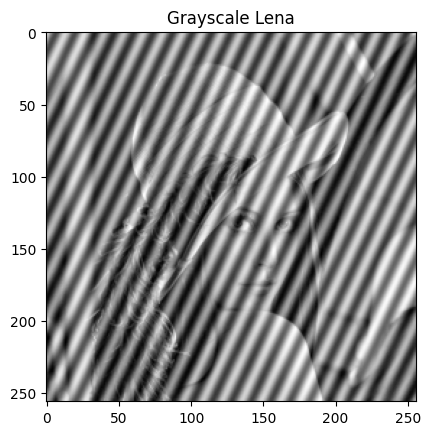

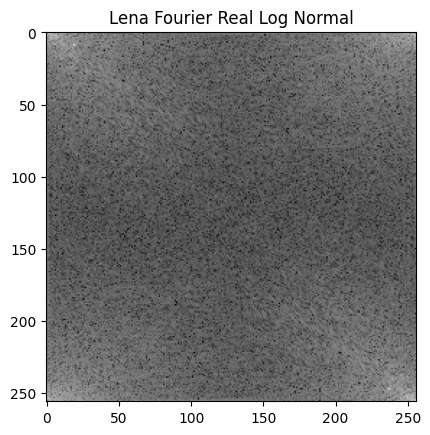

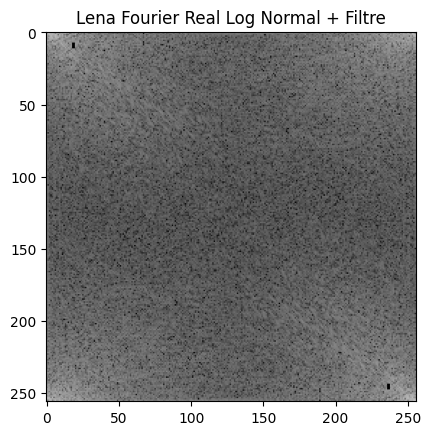

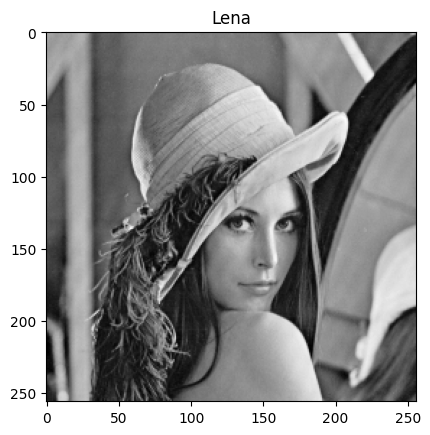

In [ ]:
lena_noisy = np.array(Image.open(path+"lena_noisy.png"))
show_image(lena_noisy,"Grayscale Lena")

lena_fourier = fft2(lena_noisy)

lena_fourier_real = np.abs(lena_fourier.real)
lena_fourier_real_log = np.log(1 + (lena_fourier_real))
lena_fourier_real_log_normal = normalize(lena_fourier_real_log)
show_image(lena_fourier_real_log_normal, "Lena Fourier Real Log Normal")

lena_fourier[8:12, 18:20] = 0
lena_fourier[244:248, 236:238] = 0

lena_fourier_real = np.abs(lena_fourier.real)
lena_fourier_real_log = np.log(1 + (lena_fourier_real))
lena_fourier_real_log_normal = normalize(lena_fourier_real_log)

show_image(lena_fourier_real_log_normal, "Lena Fourier Real Log Normal + Filtre")

lena = ifft2(lena_fourier)

show_image(lena.real, "Lena")

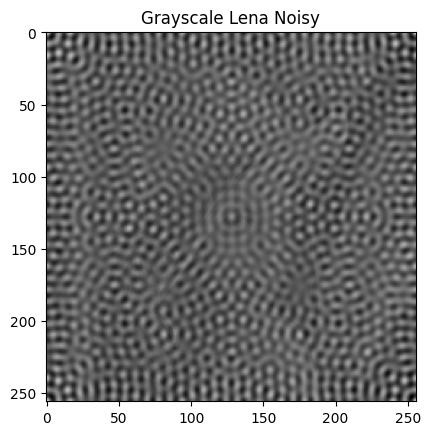

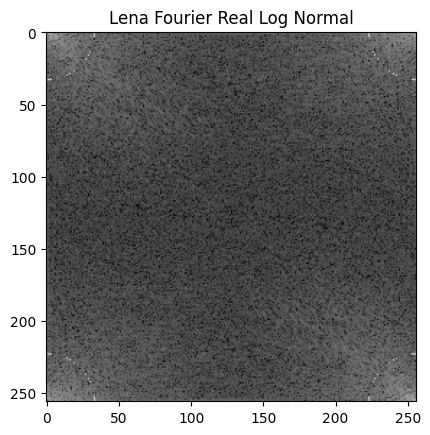

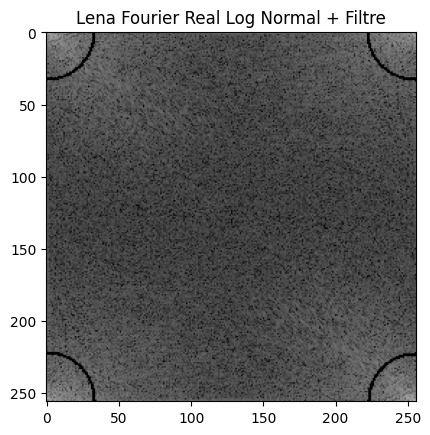

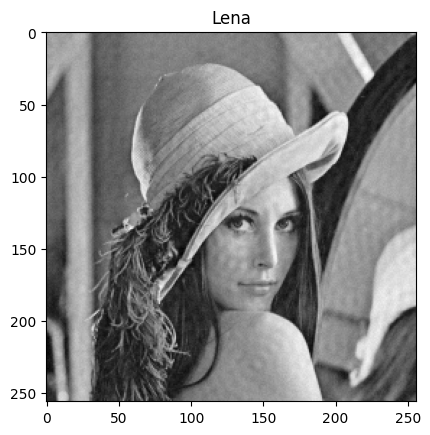

In [ ]:
lena_very_noisy = np.array(Image.open(path+"lena_verynoisy2.png"))
show_image(lena_very_noisy,"Grayscale Lena Noisy")

lena_fourier = fft2(lena_very_noisy)

lena_fourier_real = np.abs(lena_fourier.real)
lena_fourier_real_log = np.log(1 + (lena_fourier_real))
lena_fourier_real_log_normal = normalize(lena_fourier_real_log)
show_image(lena_fourier_real_log_normal, "Lena Fourier Real Log Normal")

# Adalt esquerra
for x in range(35):
  for y in range(35):
    radi = np.sqrt((x*x) + (y*y))

    if radi <= 34 and radi >= 32:
      lena_fourier[y, x] = 0

# Adalt dreta
for x in range(220, 256):
  for y in range(35):
    radi = np.sqrt(((255-x)*(255-x)) + (y*y))

    if radi <= 34 and radi >= 32:
      lena_fourier[y, x] = 0

# Abaix dreta
for x in range(220, 256):
  for y in range(220, 256):
    radi = np.sqrt(((255-x)*(255-x)) + ((255-y)*(255-y)))

    if radi <= 33 and radi >= 31:
      lena_fourier[y, x] = 0

# Abaix esquerra
for x in range(35):
  for y in range(220, 256):
    radi = np.sqrt((x*x) + ((255-y)*(255-y)))

    if radi <= 34 and radi >= 32:
      lena_fourier[y, x] = 0


lena_fourier_real = np.abs(lena_fourier.real)
lena_fourier_real_log = np.log(1 + (lena_fourier_real))
lena_fourier_real_log_normal = normalize(lena_fourier_real_log)

show_image(lena_fourier_real_log_normal, "Lena Fourier Real Log Normal + Filtre")

lena = ifft2(lena_fourier)

show_image(lena.real, "Lena")

# Exercise 2

In [ ]:
pantalons = np.asarray(Image.open(path+"pantalons.jpg"))
# show_image(pantalons, "Pantalons")

Subsampling (resize):

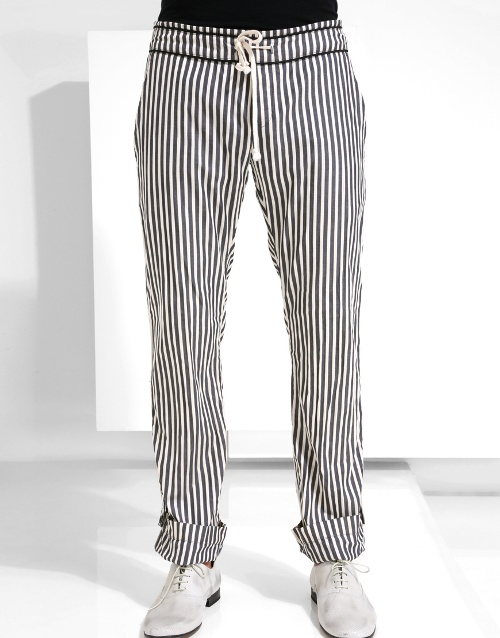

In [ ]:
pantalons1 = Image.open(path+"pantalons.jpg")
pantalons1

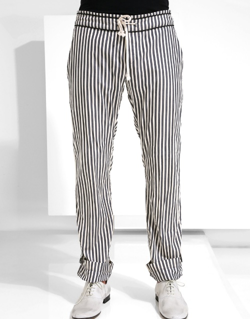

In [ ]:
# Subsampling factor 2
pantalons1.resize((pantalons.shape[1] // 2, pantalons.shape[0] // 2))

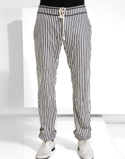

In [ ]:
# Subsampling factor 4
pantalons1.resize((pantalons.shape[1] // 4, pantalons.shape[0] // 4))

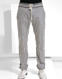

In [ ]:
# Subsampling factor 8
pantalons1.resize((pantalons.shape[1] // 8, pantalons.shape[0] // 8))

In [ ]:
# Sumbsampling factor 16
pantalons1.resize((pantalons.shape[1] // 16, pantalons.shape[0] // 16))

Subsampling pel filtre passa-baix:

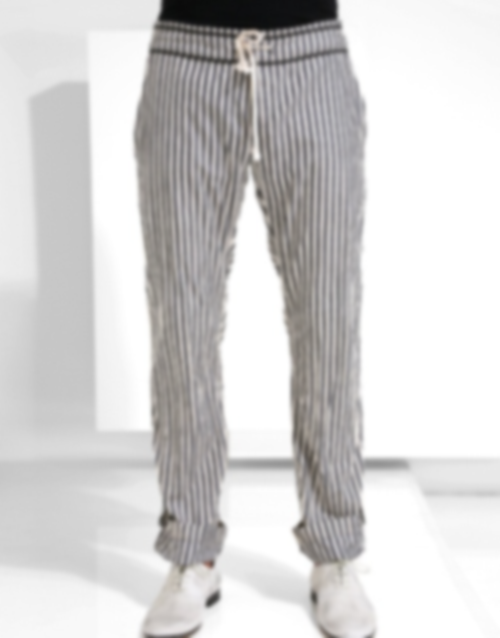

In [ ]:
pantalons_filtrat1 = pantalons1.filter(ImageFilter.GaussianBlur)
pantalons_filtrat1

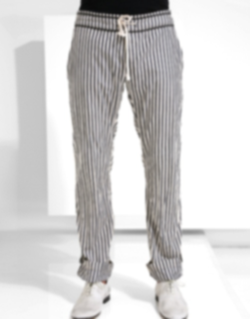

In [ ]:
# Subsampling factor 2 amb filtre
pantalons_filtrat1.resize((pantalons.shape[1] // 2, pantalons.shape[0] // 2))

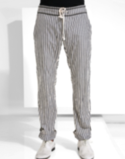

In [ ]:
# Subsampling factor 4 amb filtre
pantalons_filtrat1.resize((pantalons.shape[1] // 4, pantalons.shape[0] // 4))

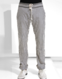

In [ ]:
# Subsampling factor 8 amb filtre
pantalons_filtrat1.resize((pantalons.shape[1] // 8, pantalons.shape[0] // 8))

In [ ]:
# Subsampling factor 16 amb filtre
pantalons_filtrat1.resize((pantalons.shape[1] // 16, pantalons.shape[0] // 16))

# Exercise 3

In [ ]:
# DFT -> fft
# IDFT -> ifft

x = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

Desplaçament 1 cap a la dreta:

In [ ]:
N = len(x)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(x)
Ck_prima = np.zeros(len(x))

f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 1 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [-1.00000000e+00 -1.33226763e-16 -8.88178420e-17  0.00000000e+00
  0.00000000e+00  8.88178420e-17 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00]


In [ ]:
N = len(y)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(y)
Ck_prima = np.zeros(len(y))

f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 1 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [-2.22044605e-17  0.00000000e+00  2.85226343e-17  4.44089210e-17
  3.78664440e-17 -1.00000000e+00 -5.15895553e-17  0.00000000e+00
  7.40493747e-18  4.44089210e-17]


Desplaçament 0.5

In [ ]:
N = len(x)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(x)
Ck_prima = np.zeros(len(x))

f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 0.5 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [-0.99442719 -0.3472136  -0.1         0.1         0.3472136   0.99442719
  0.3472136   0.1        -0.1        -0.3472136 ]


In [ ]:
N = len(y)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(y)
Ck_prima = np.zeros(len(y))

f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 0.5 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [ 0.01583844  0.05095254  0.1         0.19626105  0.63137515 -0.63137515
 -0.19626105 -0.1        -0.05095254 -0.01583844]


Desplaçament 0.1

In [ ]:
N = len(x)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(x)
Ck_prima = np.zeros(len(x))


f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 0.1 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [-0.18790105 -0.07255893 -0.00608769  0.05772036  0.15467842  1.13895757
  1.02361545  0.95714421  0.89333616  0.79637809]


In [ ]:
N = len(y)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(y)
Ck_prima = np.zeros(len(y))


f = Ck * np.exp(2j * np.pi * (k / N))

Ck_prima = Ck * np.exp(-2j * np.pi * 0.1 * (k / N))

g = np.real(ifft(Ck_prima))

print("g(t):", g)

g(t): [ 8.97777361e-03  2.10007733e-02  3.98382309e-02  8.58327722e-02
  9.83308020e-01 -1.06364347e-01 -4.54704699e-02 -2.39698151e-02
 -1.11252964e-02 -9.71125028e-04]


Desplaçament twice 0.5

In [ ]:
N = len(x)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(x)

for i in range(2):
  Ck_prima = Ck * np.exp(-2j * np.pi * 0.5 * k / N)

  g = np.real(ifft(Ck_prima))

  Ck = fft(g)

print("g(t):", g)

g(t): [-0.5  0.5  0.5  0.5  0.5  0.5 -0.5 -0.5 -0.5 -0.5]


In [ ]:
N = len(y)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(y)

for i in range(2):
  Ck_prima = Ck * np.exp(-2j * np.pi * 0.5 * k / N)

  g = np.real(ifft(Ck_prima))

  Ck = fft(g)

print("g(t):", g)

g(t): [ 0.1  0.1  0.1  0.1  0.1 -0.9  0.1  0.1  0.1  0.1]


Desplaçament 10 vegades 0.1

In [ ]:
N = len(x)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(x)

for i in range(10):
  Ck_prima = Ck * np.exp(-2j * np.pi * 0.1 * k / N)

  g = np.real(ifft(Ck_prima))

  Ck = fft(g)

print("g(t):", g)

g(t): [-0.19728548  0.80271452  0.80271452  0.80271452  0.80271452  0.80271452
 -0.19728548 -0.19728548 -0.19728548 -0.19728548]


In [ ]:
N = len(y)
k = np.zeros(N)
for i in range(N):
  k[i] = -(N/2) + i

Ck = fft(y)

for i in range(10):
  Ck_prima = Ck * np.exp(-2j * np.pi * 0.1 * k / N)

  g = np.real(ifft(Ck_prima))

  Ck = fft(g)

print("g(t):", g)

g(t): [ 0.1605429  0.1605429  0.1605429  0.1605429  0.1605429 -0.8394571
  0.1605429  0.1605429  0.1605429  0.1605429]


# Exercise 4

In [158]:
def shear_image_x(image, a):
  shear_image = np.zeros_like(image)

  for i in range(len(image[:,0])):
    for j in range(len(image[0, :])):
      x = int(i + a * j)
      y = j

      if 0 <= x < len(image[:,0]):
        shear_image[i, j] = image[x, y]

  return shear_image

def shear_image_y(image, a):
  shear_image = np.zeros_like(image)

  for i in range(len(image[:,0])):
    for j in range(len(image[0, :])):
      x = i
      y = int(j + a * i)

      if 0 <= x < len(image[:,0]):
        shear_image[i, j] = image[x, y]

  return shear_image

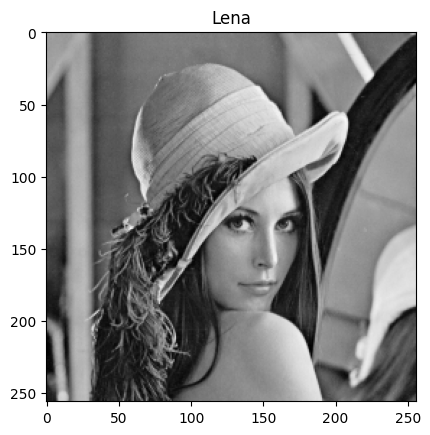

In [161]:
lena = np.array(Image.open(path+"lena.png"))

show_image(lena, "Lena")

In [163]:
#concatenar lenas

moltes_lenas = np.concatenate((lena, lena), axis=0)
moltes_lenas = np.concatenate((moltes_lenas, moltes_lenas), axis=1)

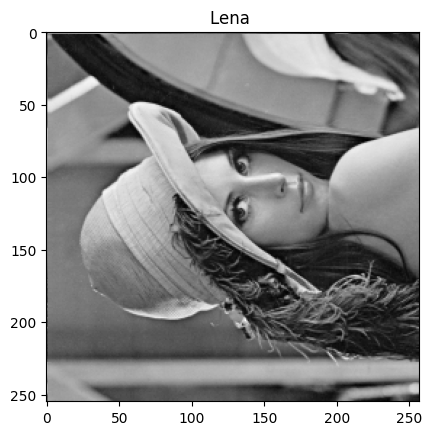

In [164]:
sheared_image = shear_image_y(moltes_lenas, -np.tan(np.pi/2 / 2))

sheared_image = shear_image_x(sheared_image, np.sin(np.pi/2))

sheared_image = shear_image_y(sheared_image, -np.tan(np.pi/2 / 2))

lena_rotada = sheared_image[0:255, 255:513]

show_image(lena_rotada, "Lena ")

# Optional Exercise

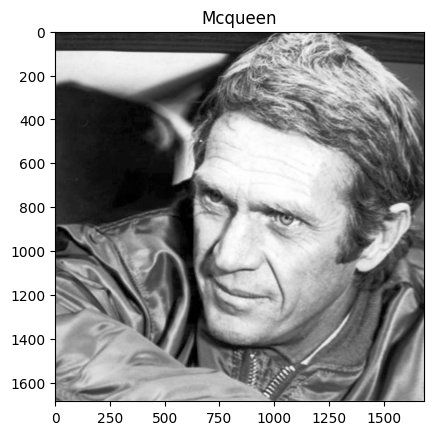

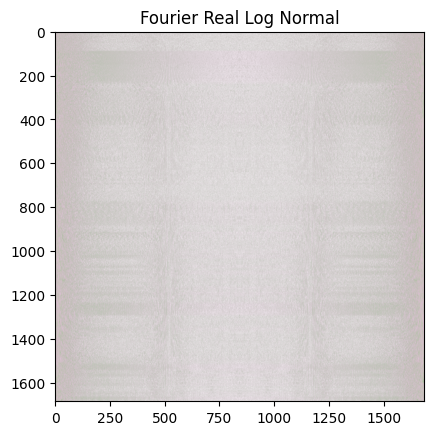

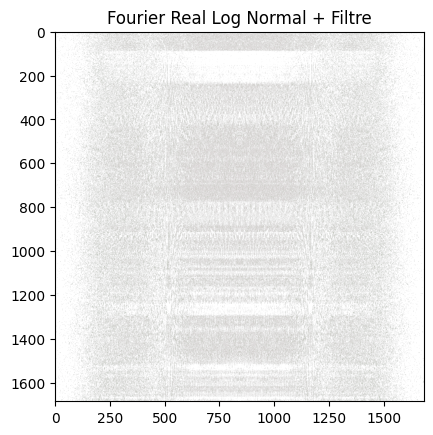

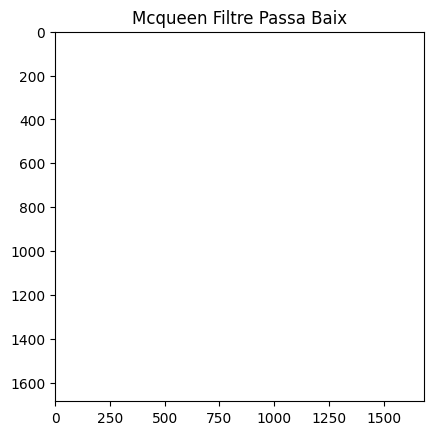

In [ ]:
mcqueen = np.array(Image.open(path+"Mcqueen.png"))
show_image(mcqueen,"Mcqueen")

mcqueen_fourier = fft2(mcqueen)

mcqueen_fourier_real = np.abs(mcqueen_fourier.real)
mcqueen_fourier_real_log = np.log(1 + (mcqueen_fourier_real))
mcqueen_fourier_real_log_normal = normalize(mcqueen_fourier_real_log)
show_image(mcqueen_fourier_real_log_normal, "Fourier Real Log Normal")

for x in range(mcqueen.shape[0]):
  for y in range(mcqueen.shape[1]):
    if mcqueen_fourier_real_log_normal[x, y, 0] >= 0.3:
      mcqueen_fourier[x, y, :] = 0

mcqueen_fourier_real = np.abs(mcqueen_fourier.real)
mcqueen_fourier_real_log = np.log(1 + (mcqueen_fourier_real))
mcqueen_fourier_real_log_normal = normalize(mcqueen_fourier_real_log)

show_image(mcqueen_fourier_real_log_normal, "Fourier Real Log Normal + Filtre")

mcqueen1 = ifft2(mcqueen_fourier)

show_image(mcqueen1.real, "Mcqueen Filtre Passa Baix")